In [1]:
!pip install itables;

In [21]:
import math
import itables.options as opt

from pathlib import Path
from tqdm import tqdm
from functools import partial
from itables import init_notebook_mode, show

from lfm_data_utilities.model_evaluations.yogo.rank_yogo_loss import (
    get_loss_df,
    display_preds_and_labels,
    select_top_n_paths,
)
from lfm_data_utilities.malaria_labelling.generate_tasks_from_list import (
    make_yogo_label_dir,
)
from lfm_data_utilities.malaria_labelling.generate_labelstudio_tasks import gen_task, PARASITE_DATA_RUNSET_PATH

init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [29]:
PATH_TO_MODEL = (
    "/home/axel.jacobsen/celldiagnosis/yogo/trained_models/twilight-aardvark-1094/best.pth"
)

# I think I may need to put this dataset defn. file somewhere else
PATH_TO_ALL_LABELLED_DATA_DDF = (
    "/home/axel.jacobsen/celldiagnosis/lfm-data-utilities/lfm_data_utilities/malaria_labelling/labels.yml"
)

In [ ]:
df = get_loss_df(PATH_TO_ALL_LABELLED_DATA_DDF, PATH_TO_MODEL)

calculating loss:  19%|█▊        | 32961/176097 [02:46<10:48, 220.74it/s]

In [ ]:
display_preds_and_labels = partial(
    display_preds_and_labels, df=df, path_to_pth=PATH_TO_MODEL
)

#opt.maxRows = len(df)
opt.maxBytes = 2500000000

In [ ]:
show(df)

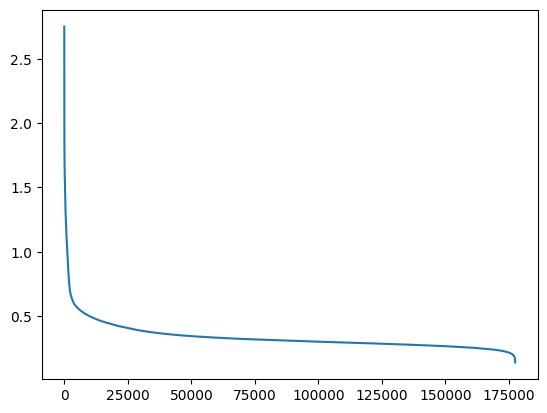

In [7]:
import matplotlib.pyplot as plt

plt.plot(sorted(df["total_loss"], reverse=True))

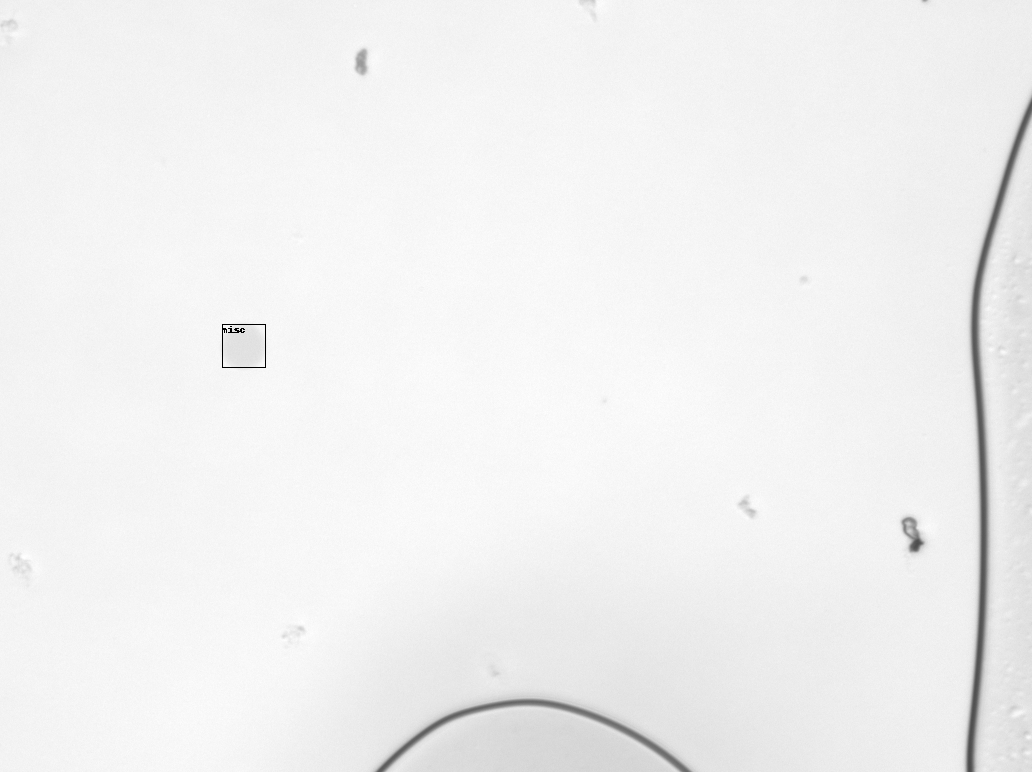

In [28]:
display_preds_and_labels(144492)

In [9]:
index_image_label_rows = select_top_n_paths(
    col_name="total_loss", n=1000, df=df, ascending=False, include_index=True
)

indices = [row[0] for row in index_image_label_rows]
image_label_paths = [row[1:] for row in index_image_label_rows]

In [27]:
out_dir = "/hpc/projects/flexo/MicroscopyData/Bioengineering/LFM_scope/label-corrections/worst_healthy_total_loss"

copy the specific labels and images from hand-labelled data into one place
make_yogo_label_dir(out_dir, image_label_paths)

# save image and label overlays so the labeller can refer to what the model thinks is going on
img_pred_label_overlay_dir = Path(out_dir) / "label_prediction_overlays"
img_pred_label_overlay_dir.mkdir(exist_ok=True)
N = int(math.log(len(indices), 10) + 1)
for i, idx in enumerate(tqdm(indices, desc="saving label and prediction overlays")):
    display_preds_and_labels(idx).save(
        img_pred_label_overlay_dir / f"img_{i:0{N}}_pred_and_label.png"
    )

gen_task(out_dir, label_dir_name="labels")

INFO:root:Reading YOLO notes and categories from /hpc/projects/flexo/MicroscopyData/Bioengineering/LFM_scope/label-corrections/worst_healthy_total_loss
INFO:root:Found 7 categories
INFO:root:Converting labels from /hpc/projects/flexo/MicroscopyData/Bioengineering/LFM_scope/label-corrections/worst_healthy_total_loss/labels
INFO:root:image extensions->, ['.png']
INFO:root:Saving Label Studio JSON to /hpc/projects/flexo/MicroscopyData/Bioengineering/LFM_scope/label-corrections/worst_healthy_total_loss/tasks.json
